Source for data used (NASDAQ): https://www.nasdaq.com/market-activity/stocks/amzn/historical

I downloaded the data for 1month.

### Table of Contents:
- Python
- Understanding the Amazon Stock Data
- Data Cleaning
- Data Visualization

In [3]:
import pandas as pd
amzn = pd.read_csv('AmazonData.csv')
print(amzn.head())
print(amzn.tail())

         Date Close/Last   Volume        Open        High         Low
0  05/24/2021   $3244.99  2422813     $3215.5    $3257.95  $3210.4993
1  05/21/2021   $3203.08  4104882       $3250  $3256.6946    $3197.01
2  05/20/2021   $3247.68  2633192  $3244.4042  $3259.6799    $3236.18
3  05/19/2021    $3231.8  2679708       $3195    $3234.75       $3184
4  05/18/2021   $3232.28  2828391   $3292.575       $3312    $3230.37
          Date Close/Last   Volume       Open       High       Low
16  04/30/2021   $3467.42  7009346   $3525.12      $3554   $3462.5
17  04/29/2021   $3471.31  7682381  $3505.098  $3514.445     $3435
18  04/28/2021    $3458.5  4631884    $3434.8   $3489.88     $3425
19  04/27/2021   $3417.43  3827140   $3443.47      $3460  $3398.01
20  04/26/2021      $3409  4880708      $3348   $3428.45  $3330.94


In [4]:
amzn.describe()

,Volume
count,2.100000e+01
mean,4.411762e+06
std,1.409438e+06
min,2.422813e+06
25%,3.356877e+06
50%,4.447696e+06
75%,4.936410e+06
max,7.682381e+06


In [5]:
amzn.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [7]:
amzn = amzn.replace({'\$':''}, regex=True) 
amzn.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,3244.99,2422813,3215.5,3257.95,3210.4993
1,05/21/2021,3203.08,4104882,3250,3256.6946,3197.01
2,05/20/2021,3247.68,2633192,3244.4042,3259.6799,3236.18
3,05/19/2021,3231.8,2679708,3195,3234.75,3184
4,05/18/2021,3232.28,2828391,3292.575,3312,3230.37


In [8]:
df = amzn 
df.columns = ['Date', 'Close', 'Volume', 'Open', 'High','Low']

df = df.astype({'Close': float, 'Volume': int, 'Open': float, 'High': float, 'Low': float})

df.dtypes

Date       object
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [9]:
df.describe()

,Close,Volume,Open,High,Low
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,3293.879524,4.411762e+06,3306.828200,3336.992595,3264.572900
std,101.511837,1.409438e+06,115.362623,109.582872,102.788709
min,3151.940000,2.422813e+06,3136.280000,3203.840000,3127.370000
25%,3223.910000,3.356877e+06,3215.500000,3256.694600,3190.000000
50%,3270.390000,4.447696e+06,3282.320000,3312.000000,3236.180000
75%,3386.490000,4.936410e+06,3356.190000,3428.450000,3330.940000
max,3471.310000,7.682381e+06,3525.120000,3554.000000,3462.500000


In [10]:
df.describe(include='float')

,Close,Open,High,Low
count,21.000000,21.000000,21.000000,21.000000
mean,3293.879524,3306.828200,3336.992595,3264.572900
std,101.511837,115.362623,109.582872,102.788709
min,3151.940000,3136.280000,3203.840000,3127.370000
25%,3223.910000,3215.500000,3256.694600,3190.000000
50%,3270.390000,3282.320000,3312.000000,3236.180000
75%,3386.490000,3356.190000,3428.450000,3330.940000
max,3471.310000,3525.120000,3554.000000,3462.500000


In [11]:
df.describe(include='object')

,Date
count,21
unique,21
top,05/03/2021
freq,1


In [12]:
df.describe(exclude='int')

,Date,Close,Open,High,Low
count,21,21.000000,21.000000,21.000000,21.000000
unique,21,NaN,NaN,NaN,NaN
top,05/03/2021,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,3293.879524,3306.828200,3336.992595,3264.572900
std,NaN,101.511837,115.362623,109.582872,102.788709
min,NaN,3151.940000,3136.280000,3203.840000,3127.370000
25%,NaN,3223.910000,3215.500000,3256.694600,3190.000000
50%,NaN,3270.390000,3282.320000,3312.000000,3236.180000
75%,NaN,3386.490000,3356.190000,3428.450000,3330.940000


In [13]:
df.describe(percentiles=[0.1, 0.5, 0.9])

,Close,Volume,Open,High,Low
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,3293.879524,4.411762e+06,3306.828200,3336.992595,3264.572900
std,101.511837,1.409438e+06,115.362623,109.582872,102.788709
min,3151.940000,2.422813e+06,3136.280000,3203.840000,3127.370000
10%,3190.490000,2.679708e+06,3185.470000,3228.860000,3133.100000
50%,3270.390000,4.447696e+06,3282.320000,3312.000000,3236.180000
90%,3458.500000,5.875530e+06,3484.730000,3489.880000,3425.000000
max,3471.310000,7.682381e+06,3525.120000,3554.000000,3462.500000


In [14]:
#Closing price higher than 3000

mask_closeprice = df.Close > 3000
high_price = df.loc[mask_closeprice]
high_price.head()

,Date,Close,Volume,Open,High,Low
0,05/24/2021,3244.99,2422813,3215.5000,3257.9500,3210.4993
1,05/21/2021,3203.08,4104882,3250.0000,3256.6946,3197.0100
2,05/20/2021,3247.68,2633192,3244.4042,3259.6799,3236.1800
3,05/19/2021,3231.80,2679708,3195.0000,3234.7500,3184.0000
4,05/18/2021,3232.28,2828391,3292.5750,3312.0000,3230.3700


In [16]:
#Closing price more than 3000 and traded at more than 5 (mil. in volume)

mask_closeprice = df.Close > 3000
mask_volume = df.Volume > 5000000

high_price_volume = df.loc[mask_closeprice & mask_volume]
high_price_volume.head()

,Date,Close,Volume,Open,High,Low
10,05/10/2021,3190.49,5838603,3282.320,3283.000,3190.0000
14,05/04/2021,3311.87,5439449,3356.190,3367.975,3272.1300
15,05/03/2021,3386.49,5875530,3484.730,3486.645,3372.7012
16,04/30/2021,3467.42,7009346,3525.120,3554.000,3462.5000
17,04/29/2021,3471.31,7682381,3505.098,3514.445,3435.0000


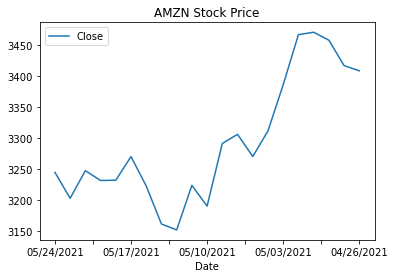

In [20]:
df.plot(x='Date', y='Close', title='AMZN Stock Price')

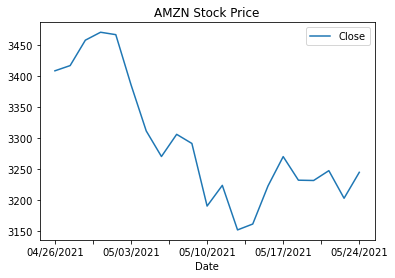

In [53]:
sort_amzn = df.sort_values('Date', ascending=True, inplace=True)
df.plot(x='Date', y='Close', title = 'AMZN Stock Price')